In [8]:
library(tidyverse)
library(fs)
library(ggtext)
library(systemfonts)

ws = '/workspace/interpretable-moes-analysis'

source(paste0(ws, '/r-utils/plots.r'))

## Transitions

In [2]:
saturation_df =
    dir_ls(paste0(ws, '/analyses/hidden-state-analysis/exports/router-analysis'), regexp = 'router-saturation-.*\\.csv$') %>%
    set_names(., str_extract(path_file(.), '(?<=^router-saturation-).*(?=\\.csv$)')) %>%
    imap(function(x, i) {
        read_csv(x, col_types = c('iidc')) %>% mutate(model = i)
    }) %>%
    list_rbind()

head(saturation_df)

# A tibble: 6 × 4
  layer_ix_1 pct_dims accuracy model
       <int>    <int>    <dbl> <chr>
1         14        0   0.0539 dsv2 
2         14        2   0.487  dsv2 
3         14        4   0.564  dsv2 
4         14        6   0.603  dsv2 
5         14        8   0.633  dsv2 
6         14       10   0.658  dsv2 

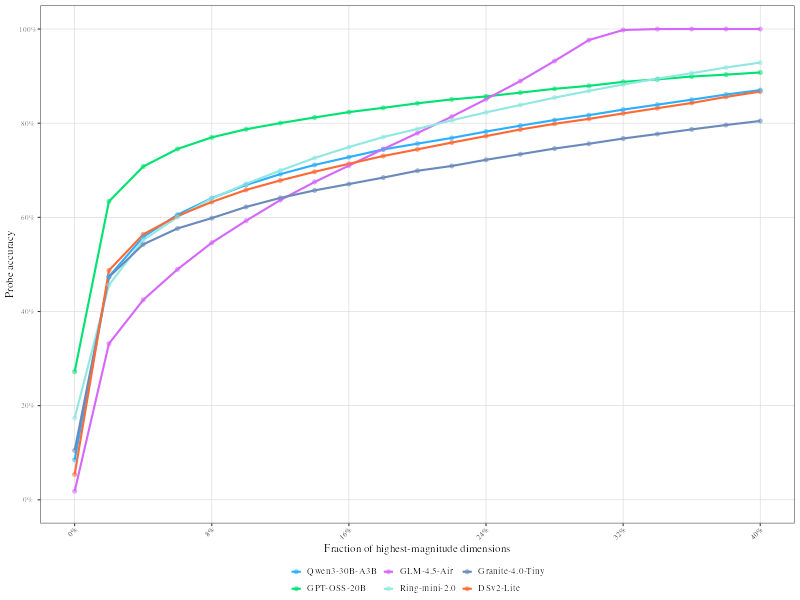

In [3]:
plot =
    saturation_df %>%
    filter(pct_dims <= 40) %>%
    filter(., model %in% c('gptoss20', 'dsv2', 'qwen3moe', 'granite', 'glm4moe', 'ringmini2')) %>%
    mutate(accuracy = accuracy * 100) %>%
    mutate(model = fct_relevel(model, 'qwen3moe', 'gptoss20', 'glm4moe', 'ringmini2', 'granite', 'dsv2')) %>%
    ggplot() + 
    geom_line(aes(x = pct_dims, y = accuracy, color = model, group = model), linewidth = 1.0) +
    geom_point(aes(x = pct_dims, y = accuracy, color = model, group = model), size = 1.8, alpha = 0.5) +
    scale_color_manual(
        labels = c(
            `olmoe` = 'OlMoE', `gptoss20` = 'GPT-OSS-20B', `dsv2` = 'DSv2-Lite', `qwen3moe` = 'Qwen3-30B-A3B',
            `ringmini2` = 'Ring-mini-2.0', `kimivl` = 'Kimi-VL-A3B', `granite` = 'Granite-4.0-Tiny', `glm4moe` = 'GLM-4.5-Air'

        ),
        values = c(
            `olmoe` = '#544fc5', `gptoss20` = '#00e272', `dsv2` = '#fe6a35', `qwen3moe` = '#2caffe',
            `ringmini2` = '#91e8e1', `kimivl` = '#feb56a', `granite` = '#6b8abc', `glm4moe` = '#d568fb'
        )
    ) +
    scale_x_continuous(
        breaks = seq(0, 100, 8),
        labels = function(x) paste0(x, '%')
    ) +
    # scale_x_log10(
    #     limits = c(0.001, 20),  # Focus on 0.5% to 20%
    #     breaks = c(0, 0.1, 1, 2, 5, 10, 20),
    #     labels = function(x) paste0(x, '%')
    # ) +
    scale_y_continuous(
        limits = c(0, 100),
        breaks = seq(0, 100, 20),
        labels = function(x) paste0(x, '%')
    ) +
    labs(title = NULL, color = NULL, x = 'Fraction of highest-magnitude dimensions', y = 'Probe accuracy') +
    theme_iclr(base_size = 11)

ggsave(
    str_glue('{ws}/analyses/hidden-state-analysis/exports/router-analysis/router-saturation-md.pdf'),
    plot = plot, 
    width = 7, height = 3.0,
    units = 'in', dpi = 300,
    device = cairo_pdf
)
ggsave(
    str_glue('{ws}/analyses/hidden-state-analysis/exports/router-analysis/router-saturation-md.png'),
    plot = plot, 
    width = 7, height = 3.0,
    units = "in", dpi = 300
)

plot

## Rotation plot